In [2]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,confusion_matrix

In [3]:
#read the excel file

import pandas as pd
X = pd.read_csv(r'C:\Users\Wouter\Documents\jaar 4\tested_molecules-1.csv')
X.head()


,SMILES,ALDH1_inhibition
0,COc1ccccc1CC(NC(C)=O)C(=O)NC1CCN(c2nnnn2-c2ccc...,1
1,O=C(CSc1nc2cccnc2n1Cc1ccccc1)NCc1ccco1,1
2,Cc1cccc2cc(C[NH+](CC3CCCO3)C(c3nnnn3Cc3ccco3)C...,1
3,CCN(CC)c1ccc2c(Cl)c(Br)c(=O)oc2c1,1
4,CS(=O)(=O)N1CCc2cc(-c3csc(NC(=O)Cc4cccs4)n3)ccc21,1


In [4]:
#used random data to check the code
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)
X = data[['student', 'balance', 'income']]
y = data['default']

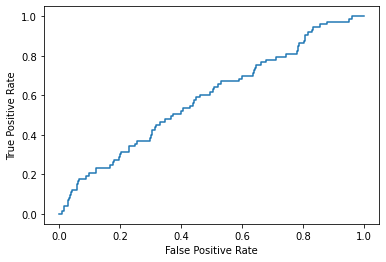

[0.00484665 0.02645691 0.003768   ... 0.14379866 0.10434632 0.00162481]


In [7]:
#define kfold cross validation
kFold = KFold(n_splits=5,shuffle=True,random_state= 1) # five folds, shuffle data= True , set seed to 1 so that train-validate splits are always deterministic
#make logistic regression
acc_score=list()
model = LogisticRegression()
for train_index , test_index in kFold.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]

    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)


predictions = model.predict(X_test)
#create list of probabilities.
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
#calculate auc
auc = roc_auc_score(y_test, y_pred_proba)
#plot roc
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
confusion_matrix(y_test,predictions)
print(auc)



array([0, 0, 0, ..., 0, 0, 0], dtype=int64)